In [1]:
import pandas as pd

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# Loading data files

In [2]:
# Import data file to pandas
#data_path = 'data/train/biwi/biwi_hotel.txt'
data_path = 'data/train/stanford/bookstore_1.txt'

df = pd.read_csv(data_path, sep=" ", header=None)
df.columns = ["frame_id", "agent_id", "x", "y"]

# Basic stats

In [3]:
# Number of data points
df.count()

frame_id    10880
agent_id    10880
x           10880
y           10880
dtype: int64

In [4]:
# Number of frames
frame_ids = df.frame_id.unique()
print("Number of frames:", len(frame_ids))

Number of frames: 1171


In [5]:
# Number of agent trajectories
agent_ids = df.agent_id.unique()
print("Number of agents:", len(agent_ids))

Number of agents: 544


In [6]:
agent_ids

array([ 65,  70, 131, 320, 322, 451, 483,  75,  43, 319,  66,  71, 132,
       321, 323, 452, 484,  76,  44,  67,  72, 133, 394,  63,  69,  73,
        77,  45,  68, 134, 395,  64,  74,  78,  46, 135, 396,  12,  20,
       136, 397,  13,  21,  18, 137, 398,  14,   6,  84, 202, 301, 399,
        88,  22,  19, 138,  15,   7,  85, 203, 302, 400,  10,  89, 429,
       139,  16,   8,  86, 204, 303,   5,  23,  80,  90, 412, 430, 418,
       140,  17,   9,  87, 205, 304,  24,  81,  94, 425,  91, 413, 188,
       431, 419,  95,  93, 141, 206, 305, 423,  82, 408, 426,  92, 414,
       189, 432, 198, 420, 142, 207, 306, 424,  83, 409, 427, 415, 190,
       433, 199, 421, 143, 428, 208, 307, 410, 212, 313, 416, 191, 200,
       422, 144, 209, 308, 411, 213, 314, 417, 192, 201, 145, 210, 309,
       196, 214, 315, 194, 197, 193, 146, 211, 310, 215, 316, 195, 147,
       311, 317, 109, 148, 312, 318, 110, 149, 111, 150, 542, 112, 151,
       543, 434, 113, 162, 168, 152, 544, 114, 163, 169, 153, 54

In [7]:
# Min/Max of x, y coordinates
x_min = df.x.min()
x_max = df.x.max()
y_min = df.y.min()
y_max = df.y.max()

print("x min:", x_min)
print("x max:", x_max)
print("y min:", y_min)
print("y max:", y_max)

x min: -28.104
x max: 27.885
y min: -21.263
y max: 21.103


# Visualizing trajectories

In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from matplotlib import animation, rc
from IPython.display import HTML

In [9]:
# Selecting all the points in a single frame
frame = df.loc[df.frame_id == 0]
frame

,frame_id,agent_id,x,y
0,0,65,27.247,-14.242
20,0,70,14.042,12.846
40,0,131,-1.197,-6.882
60,0,320,-0.658,-10.053
80,0,322,1.795,-8.816
100,0,451,-21.163,9.295
120,0,483,14.401,4.109


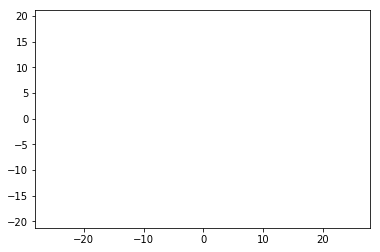

In [10]:
# Create color maps to distinguish individual agents
colors = cm.flag(np.linspace(0, 1, len(agent_ids)))
colormap = dict(zip(agent_ids, colors))

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

trajs = ax.scatter([], [])
frame_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
agent_text = ax.text(0.05, 0.8, '', transform=ax.transAxes)

In [11]:
# initialization function: plot the background of each frame
def init():
    trajs.set_offsets([], [])
    frame_text.set_text("")
    agent_text.set_text("")
    return (trajs, frame_text)

In [12]:
def animate(i):
    frame = df.loc[df.frame_id == frame_ids[i]]
    coords = []
    colors = []
    for j, row in frame.iterrows():
        agent_id = row.agent_id
        x = row.x
        y = row.y
        c = colormap[agent_id]
        coords.append((x, y))
        colors.append(c)
    
    trajs.set_offsets(coords)
    trajs.set_facecolors(colors)
    frame_text.set_text("Frame: %d" %(frame_ids[i]))
    
    agents = [str(agent_id) for agent_id in frame.agent_id]
    agent_text.set_text("Agents: " + ', '.join(sorted(agents)))
    
    return (trajs, frame_text, agent_text)

In [13]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=len(frame_ids))

In [ ]:
HTML(anim.to_html5_video())